In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
file_path = "airfoil_self_noise.dat"
columns = ["Frequency", "Angle of Attack", "Chord Length", "Free-stream Velocity", "Suction Side Thickness", "Scaled SPL"]
df = pd.read_csv(file_path, sep="\t", header=None, names=columns)
df.head()

,Frequency,Angle of Attack,Chord Length,Free-stream Velocity,Suction Side Thickness,Scaled SPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
df.columns = df.columns.str.strip()
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

lr_original = LinearRegression()
lr_original.fit(X_train, y_train)
y_pred_original = lr_original.predict(X_test)

lr_pca = LinearRegression()
lr_pca.fit(X_pca_train, y_train)
y_pred_pca = lr_pca.predict(X_pca_test)

In [5]:
print("R2 Original:", r2_score(y_test, y_pred_original))
print("RMSE Original:", np.sqrt(mean_squared_error(y_test, y_pred_original)))
print("R2 PCA:", r2_score(y_test, y_pred_pca))
print("RMSE PCA:", np.sqrt(mean_squared_error(y_test, y_pred_pca)))

R2 Original: 0.5582979754897288
RMSE Original: 4.704109194974885
R2 PCA: 0.002542856822182582
RMSE PCA: 7.069029952393537


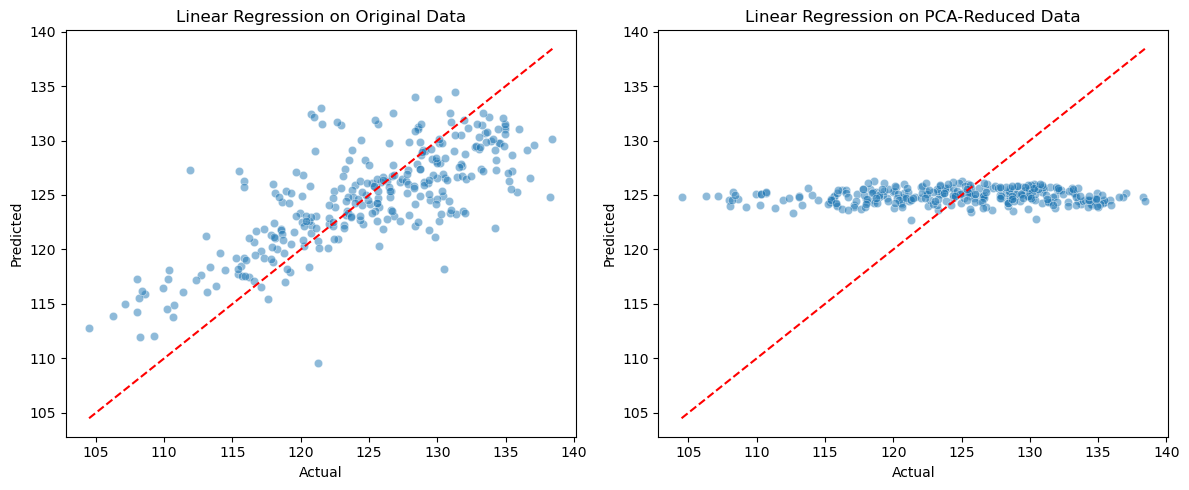

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_original, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression on Original Data")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_pca, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression on PCA-Reduced Data")

plt.tight_layout()
plt.show()